In [1]:
# Importing necessary libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import roc_curve, auc  # Importing for ROC curve


In [2]:
# Data Collection
# Load the dataset
my_data = pd.read_csv(r"C:\Users\sande\Desktop\data_folder\fraud_data.csv")

# Display the first few rows of the dataset
my_data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [3]:
# Display information about the dataset
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1852394 entries, 0 to 1852393
Data columns (total 23 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Unnamed: 0             int64  
 1   trans_date_trans_time  object 
 2   cc_num                 int64  
 3   merchant               object 
 4   category               object 
 5   amt                    float64
 6   first                  object 
 7   last                   object 
 8   gender                 object 
 9   street                 object 
 10  city                   object 
 11  state                  object 
 12  zip                    int64  
 13  lat                    float64
 14  long                   float64
 15  city_pop               int64  
 16  job                    object 
 17  dob                    object 
 18  trans_num              object 
 19  unix_time              int64  
 20  merch_lat              float64
 21  merch_long             float64
 22  is_fraud          

In [4]:
# Display summary statistics of the dataset
my_data.describe()


,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06
mean,5.371934e+05,4.173860e+17,7.006357e+01,4.881326e+04,3.853931e+01,-9.022783e+01,8.864367e+04,1.358674e+09,3.853898e+01,-9.022794e+01,5.210015e-03
std,3.669110e+05,1.309115e+18,1.592540e+02,2.688185e+04,5.071470e+00,1.374789e+01,3.014876e+05,1.819508e+07,5.105604e+00,1.375969e+01,7.199217e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902742e+01,-1.666716e+02,0.000000e+00
25%,2.315490e+05,1.800429e+14,9.640000e+00,2.623700e+04,3.466890e+01,-9.679800e+01,7.410000e+02,1.343017e+09,3.474012e+01,-9.689944e+01,0.000000e+00
50%,4.630980e+05,3.521417e+15,4.745000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.443000e+03,1.357089e+09,3.936890e+01,-8.744069e+01,0.000000e+00
75%,8.335758e+05,4.642255e+15,8.310000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.374581e+09,4.195626e+01,-8.024511e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.992100e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.388534e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [5]:
# Data Cleaning

# Checking for missing values
my_data.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [6]:
# Dropping missing values
my_data = my_data.dropna()

In [7]:
# Checking for duplicated rows
my_data.duplicated().sum()

0

In [8]:
# Exploratory Data Analysis (EDA)

# Summary statistics
my_data.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06
mean,5.371934e+05,4.173860e+17,7.006357e+01,4.881326e+04,3.853931e+01,-9.022783e+01,8.864367e+04,1.358674e+09,3.853898e+01,-9.022794e+01,5.210015e-03
std,3.669110e+05,1.309115e+18,1.592540e+02,2.688185e+04,5.071470e+00,1.374789e+01,3.014876e+05,1.819508e+07,5.105604e+00,1.375969e+01,7.199217e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902742e+01,-1.666716e+02,0.000000e+00
25%,2.315490e+05,1.800429e+14,9.640000e+00,2.623700e+04,3.466890e+01,-9.679800e+01,7.410000e+02,1.343017e+09,3.474012e+01,-9.689944e+01,0.000000e+00
50%,4.630980e+05,3.521417e+15,4.745000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.443000e+03,1.357089e+09,3.936890e+01,-8.744069e+01,0.000000e+00
75%,8.335758e+05,4.642255e+15,8.310000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.374581e+09,4.195626e+01,-8.024511e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.992100e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.388534e+09,6.751027e+01,-6.695090e+01,1.000000e+00


Fraudulent Transactions: 9651
Non-Fraudulent Transactions: 1842743


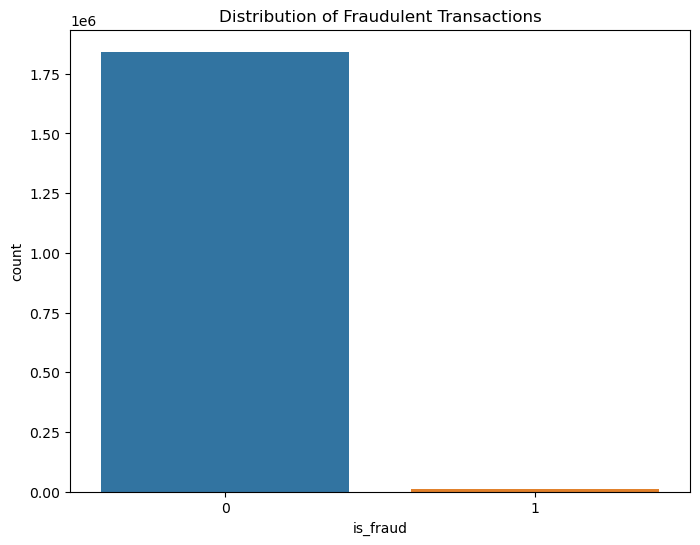

In [9]:
# Visualizing the distribution of the target variable 'is_fraud'
plt.figure(figsize=(8, 6))
sns.countplot(x='is_fraud', data=my_data)
plt.title('Distribution of Fraudulent Transactions')

# Save the plot to the specified folder
output_folder = r"C:\Users\sande\Desktop\MSDA 304 VISUALIZATION"
output_filename = "fraudulent_transactions_distribution.png"
output_path = os.path.join(output_folder, output_filename)
plt.savefig(output_path)

# Count the occurrences of each class
fraudulent_count = (my_data['is_fraud'] == 1).sum()
non_fraudulent_count = (my_data['is_fraud'] == 0).sum()

# Print the counts
print("Fraudulent Transactions:", fraudulent_count)
print("Non-Fraudulent Transactions:", non_fraudulent_count)

plt.show()


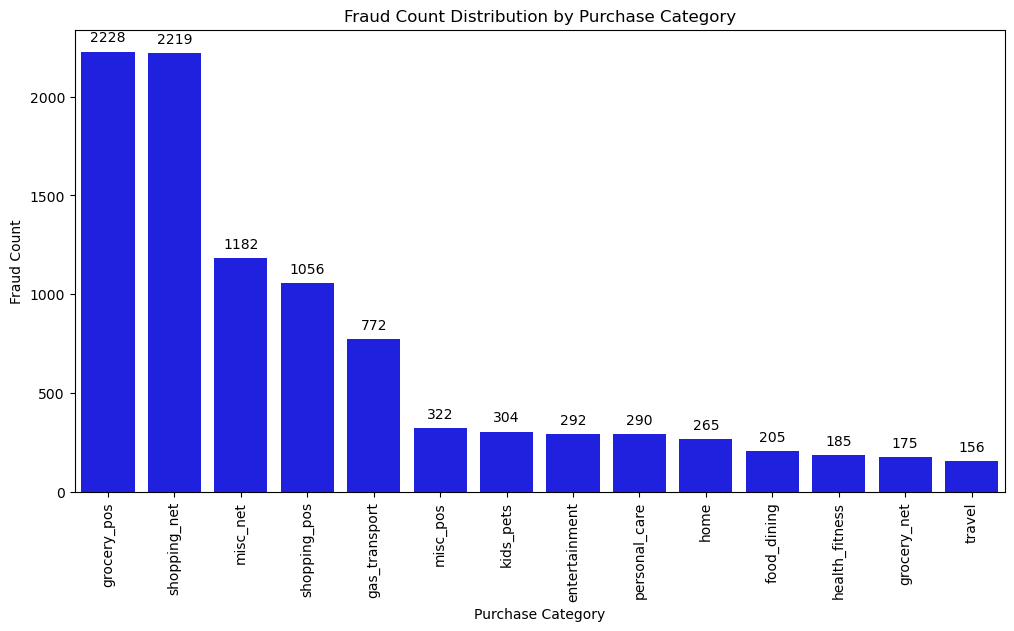

In [10]:
# Visualizing fraud count by purchase category
my_data_by_cat = my_data[my_data['is_fraud'] == 1]['category'].value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(x=my_data_by_cat.index, y=my_data_by_cat, color='blue')
plt.xticks(rotation=90)
plt.xlabel('Purchase Category')
plt.ylabel('Fraud Count')
plt.title('Fraud Count Distribution by Purchase Category')

# Adding numerical values to the bars
for i, v in enumerate(my_data_by_cat):
    plt.text(i, v + 50, str(v), ha='center')

# Save the graph
plt.savefig(r'C:\Users\sande\Desktop\MSDA 304 VISUALIZATION\fraud_count_by_purchase_category.png')

plt.show()


Non-Fraudulent Transactions (Female): 1009850
Non-Fraudulent Transactions (Male): 832893
Fraudulent Transactions (Female): 4899
Fraudulent Transactions (Male): 4752


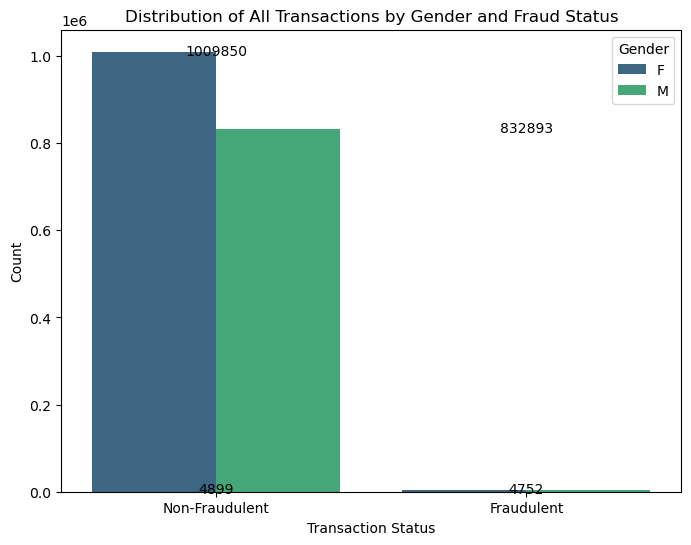

In [11]:
# Visualizing distribution of all transactions by gender and fraud status
plt.figure(figsize=(8, 6))
sns.countplot(x='is_fraud', hue='gender', data=my_data, palette='viridis')
plt.xlabel('Transaction Status')
plt.ylabel('Count')
plt.title('Distribution of All Transactions by Gender and Fraud Status')
plt.legend(title='Gender', loc='upper right')

# Add labels for x-axis
plt.xticks([0, 1], ['Non-Fraudulent', 'Fraudulent'])

# Add numerical values for non-fraudulent transactions
total_counts = my_data.groupby(['gender', 'is_fraud']).size().reset_index(name='counts')

non_fraud_female_count = total_counts[(total_counts['is_fraud'] == 0) & (total_counts['gender'] == 'F')]['counts'].values[0]
non_fraud_male_count = total_counts[(total_counts['is_fraud'] == 0) & (total_counts['gender'] == 'M')]['counts'].values[0]

# Add numerical values for fraudulent transactions
fraud_female_count = total_counts[(total_counts['is_fraud'] == 1) & (total_counts['gender'] == 'F')]['counts'].values[0]
fraud_male_count = total_counts[(total_counts['is_fraud'] == 1) & (total_counts['gender'] == 'M')]['counts'].values[0]

# Add numerical values to the graph for non-fraudulent transactions
plt.text(0, non_fraud_female_count, str(non_fraud_female_count), ha='center', va='center')
plt.text(1, non_fraud_male_count, str(non_fraud_male_count), ha='center', va='center')

# Add numerical values to the graph for fraudulent transactions
plt.text(0, fraud_female_count, str(fraud_female_count), ha='center', va='center')
plt.text(1, fraud_male_count, str(fraud_male_count), ha='center', va='center')

# Save the graph
plt.savefig("C:/Users/sande/Desktop/MSDA 304 VISUALIZATION/fraud_counts_by_gender.png")

# Print numerical values for non-fraudulent and fraudulent transactions
print("Non-Fraudulent Transactions (Female):", non_fraud_female_count)
print("Non-Fraudulent Transactions (Male):", non_fraud_male_count)
print("Fraudulent Transactions (Female):", fraud_female_count)
print("Fraudulent Transactions (Male):", fraud_male_count)

# Show the plot
plt.show()

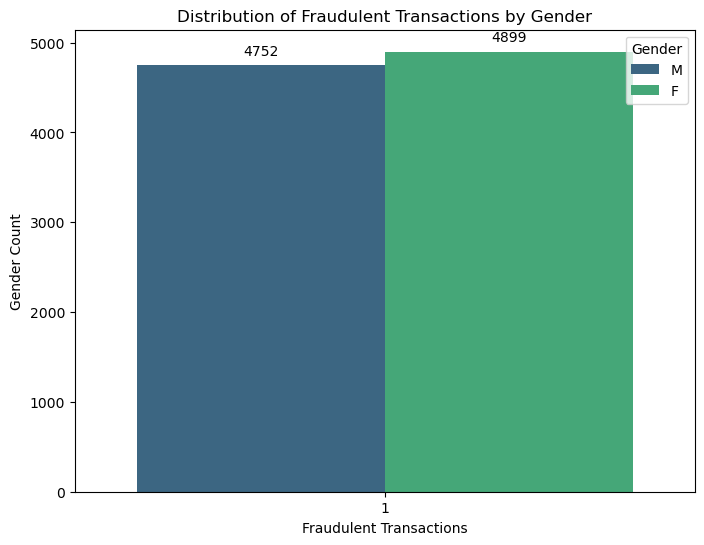

In [12]:
# Visualizing fraudulent transaction counts by gender
fraudulent_data = my_data[my_data['is_fraud'] == 1]
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='is_fraud', hue='gender', data=fraudulent_data, palette='viridis')
plt.xlabel('Fraudulent Transactions')
plt.ylabel('Gender Count')
plt.title('Distribution of Fraudulent Transactions by Gender')
plt.legend(title='Gender', loc='upper right')

# Adding numerical values to the bars
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 10), 
                   textcoords = 'offset points')

# Save the graph
plt.savefig(r'C:\Users\sande\Desktop\MSDA 304 VISUALIZATION\fraudulent_transaction_counts.png')

plt.show()

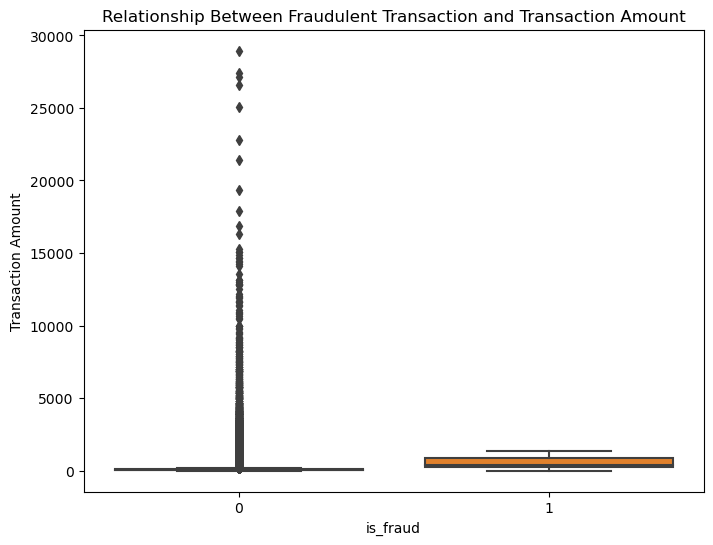

In [29]:
# Box plot for transaction amount and fraud status
plt.figure(figsize=(8, 6))
sns.boxplot(x='is_fraud', y='amt', data=my_data)
plt.xlabel('is_fraud')
plt.ylabel('Transaction Amount')
plt.title('Relationship Between Fraudulent Transaction and Transaction Amount')
# Save the graph
plt.savefig(r'C:\Users\sande\Desktop\MSDA 304 VISUALIZATION\fraudulent_transaction_counts.png')

plt.show()

In [14]:
# Feature Engineering

# Extracting month, day of the week, and hour features
my_data['trans_date_trans_time'] = pd.to_datetime(my_data['trans_date_trans_time'])
my_data['month'] = my_data['trans_date_trans_time'].dt.month
my_data['day_of_week'] = my_data['trans_date_trans_time'].dt.dayofweek
my_data['hour'] = my_data['trans_date_trans_time'].dt.hour


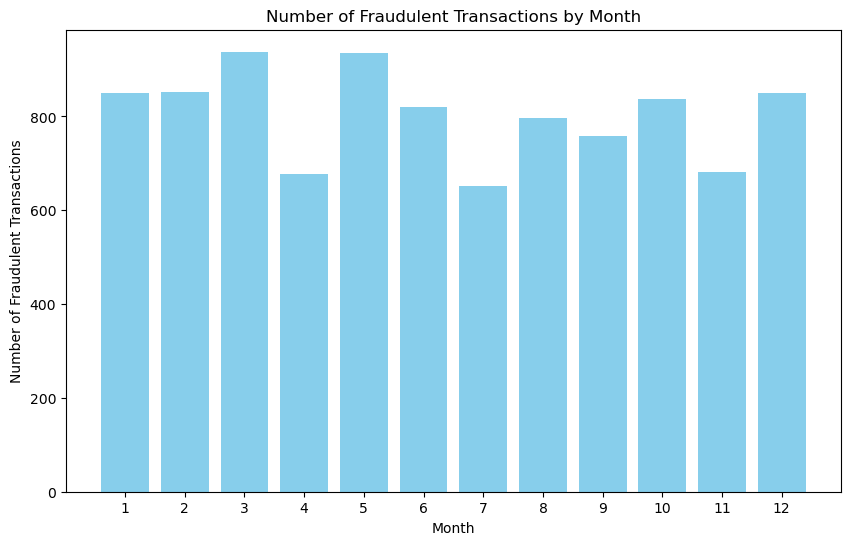

In [30]:
# Plotting number of fraudulent transactions by month
monthly_fraud_count = my_data.groupby('month')['is_fraud'].sum()
plt.figure(figsize=(10, 6))
plt.bar(monthly_fraud_count.index, monthly_fraud_count.values, color='skyblue')
plt.title('Number of Fraudulent Transactions by Month')
plt.xlabel('Month')
plt.ylabel('Number of Fraudulent Transactions')
plt.xticks(range(1, 13))  # Assuming months are represented by integers 1-12
# Save the graph
file_path = r'C:\Users\sande\Desktop\MSDA 304 VISUALIZATION\fraudulent_transaction_counts.png'
plt.savefig(file_path)

plt.show()

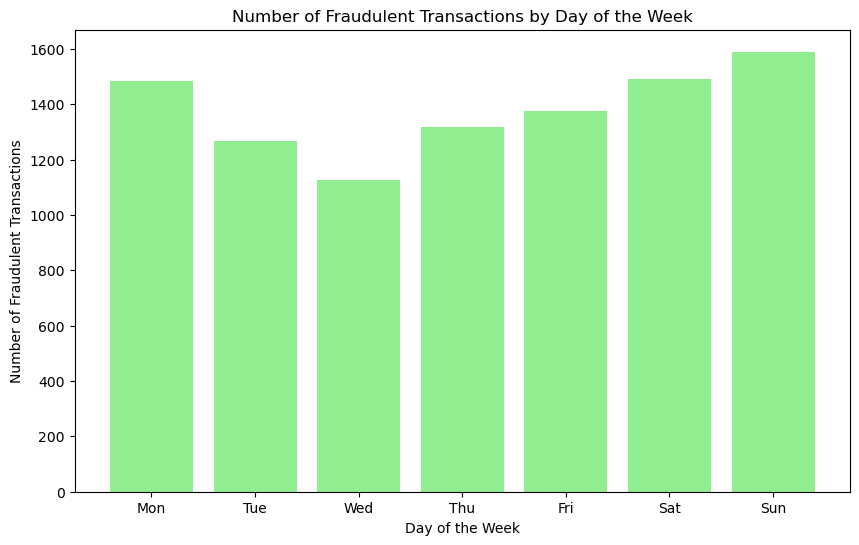

In [31]:
# Plotting number of fraudulent transactions by day of the week
weekly_fraud_count = my_data.groupby('day_of_week')['is_fraud'].sum()
plt.figure(figsize=(10, 6))
plt.bar(weekly_fraud_count.index, weekly_fraud_count.values, color='lightgreen')
plt.title('Number of Fraudulent Transactions by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Fraudulent Transactions')
plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])  # Assuming Monday is 0
# Save the graph
file_path = r'C:\Users\sande\Desktop\MSDA 304 VISUALIZATION\fraudulent_transaction_counts.png'
plt.savefig(file_path)

plt.show()

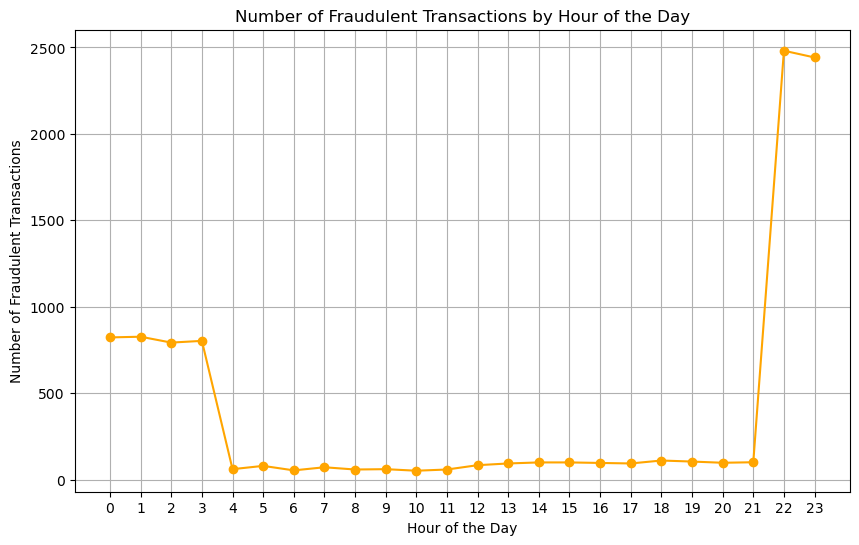

In [32]:
# Plotting number of fraudulent transactions by hour of the day
hourly_fraud_count = my_data.groupby('hour')['is_fraud'].sum()
plt.figure(figsize=(10, 6))
plt.plot(hourly_fraud_count.index, hourly_fraud_count.values, marker='o', color='orange')
plt.title('Number of Fraudulent Transactions by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Fraudulent Transactions')
plt.xticks(range(24))  # Assuming hours are represented from 0 to 23
plt.grid(True)
# Save the graph
file_path = r'C:\Users\sande\Desktop\MSDA 304 VISUALIZATION\fraudulent_transaction_counts.png'
plt.savefig(file_path)

plt.show()

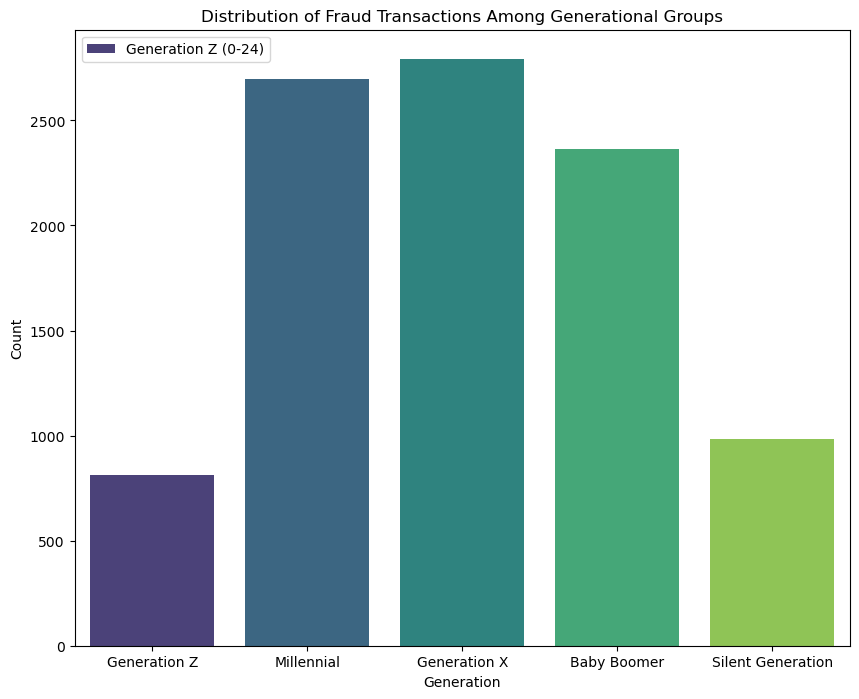

In [33]:
# Convert 'trans_date_trans_time' and 'dob' to datetime format
my_data['trans_date_trans_time'] = pd.to_datetime(my_data['trans_date_trans_time'])
my_data['dob'] = pd.to_datetime(my_data['dob'])

# Calculate age by subtracting 'dob' from 'trans_date_trans_time'
my_data['age'] = (my_data['trans_date_trans_time'] - my_data['dob']).dt.days // 365

# Define generational labels
bins = [0, 24, 40, 56, 76, 101]  # Generational age ranges
labels = ['Generation Z', 'Millennial', 'Generation X', 'Baby Boomer', 'Silent Generation']

# Categorize age into generational groups
my_data['generation'] = pd.cut(my_data['age'], bins=bins, labels=labels, right=False)

# Filter only fraud transactions
fraud_data = my_data[my_data['is_fraud'] == 1]

# Plot the distribution of fraud among generational groups
plt.figure(figsize=(10, 8))
sns.countplot(x='generation', data=fraud_data, palette='viridis')

# Create custom legend labels
legend_labels = [f'{labels[i]} ({bins[i]}-{bins[i+1]})' for i in range(len(labels))]

# Add legend with custom labels
plt.legend(legend_labels, loc='upper left')

plt.xlabel('Generation')
plt.ylabel('Count')
plt.title('Distribution of Fraud Transactions Among Generational Groups')
# Save the graph
file_path = r'C:\Users\sande\Desktop\MSDA 304 VISUALIZATION\fraudulent_transaction_counts.png'
plt.savefig(file_path)

plt.show()

In [35]:
import pandas as pd
from datetime import datetime
from datetime import date
import plotly.graph_objects as go

# Exploring Fraud Patterns Across States

# Calculating fraud rates by state
fraud_by_state = my_data.groupby('state').is_fraud.sum()
total_transactions_by_state = my_data.groupby('state').trans_num.count()
fraud_rate = (fraud_by_state / total_transactions_by_state).sort_values()

# Merging data for visualization
merged_data = pd.merge(fraud_by_state, total_transactions_by_state, how='inner', on='state').sort_values('is_fraud', ascending=False)
fraud_rate_df = pd.DataFrame(fraud_rate).reset_index().rename(columns={0: 'fraud_rate'})
full_data = pd.merge(merged_data, fraud_rate_df, how='inner', on='state')
full_data = full_data.rename(columns={'is_fraud': 'Number of Fraudulent Transactions', 'trans_num': 'Total Number of Transactions', 'fraud_rate': 'Fraud Rate'})

# Plotting Fraud Rate by State using Plotly
fig = go.Figure(data=go.Choropleth(
    locations=full_data['state'],  # Spatial coordinates
    z=full_data['Fraud Rate'].astype(float),  # Data to be color-coded
    locationmode='USA-states',  # Set of locations matching entries in `locations`
    colorscale='Blues',  # You can change the colorscale to any Plotly colorscale you prefer
    colorbar_title="Fraud Rate Spectrum",
    customdata=full_data[['state', 'Number of Fraudulent Transactions', 'Total Number of Transactions', 'Fraud Rate']],
    hovertemplate='<br>'.join([
        'State: %{customdata[0]}',
        'Total Transactions: %{customdata[2]}',
        'Number of Fraudulent Transactions: %{customdata[1]}',
        'Fraud Rate: %{customdata[3]:.5f}'
    ])
))

# Updating layout and displaying the map
fig.update_layout(
    title_text='Fraud Rate Analysis by State',
    geo_scope='usa',  # Limit map scope to USA
    autosize=False,
    width=1000,
    height=500
)
# Specify the directory where the image will be saved
directory = r'C:\Users\sande\Desktop\MSDA 304 VISUALIZATION'

# Generate a unique filename using timestamp
timestamp = datetime.now().strftime('%Y%m%d%H%M%S')
file_path = os.path.join(directory, f'fraud_rate_analysis_{timestamp}.png')

# Save the image
fig.write_image(file_path)

Fraudulent Transactions: 9651
Non-Fraudulent Transactions: 9651


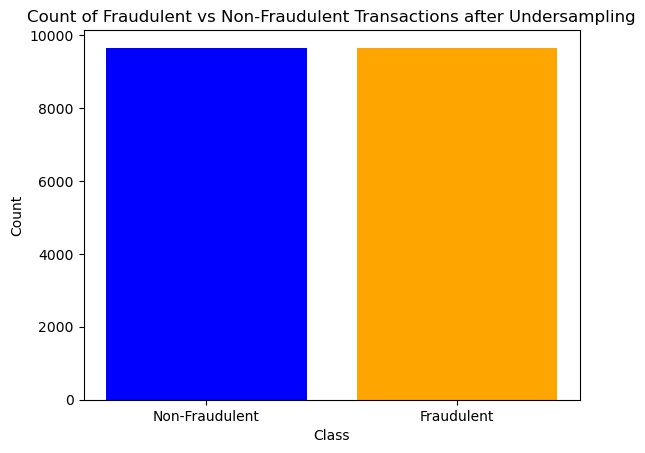

In [20]:
-

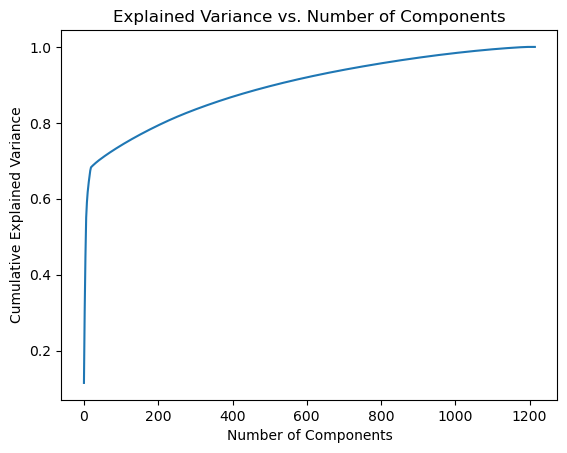

In [36]:
# PCA (Principal Component Analysis)

# Initialize PCA
pca = PCA()

# Fit PCA to your scaled data
pca.fit(features)

# Plot explained variance
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
# Save the PCA plot
output_path_pca = "C:\\Users\\sande\\Desktop\\MSDA 304 VISUALIZATION\\pca_plot.png"
plt.savefig(output_path_pca)


In [22]:
# Choose the number of components (e.g., 95% of variance)
n_components = np.argmax(np.cumsum(pca.explained_variance_ratio_) >= 0.95) + 1

# Print the chosen number of components
print(f"Number of components chosen: {n_components}")

# Transform data with the chosen components
pca = PCA(n_components=n_components)
x_pca = pca.fit_transform(features)

Number of components chosen: 760


In [23]:
# Data Splitting

# Split the data into training and testing sets
x_train_pca, x_test_pca, y_train, y_test = train_test_split(x_pca, y_resampled, test_size=0.2, random_state=42)

# Display the shapes of the resulting sets
print("Training set shape:", x_train_pca.shape, y_train.shape)
print("Testing set shape:", x_test_pca.shape, y_test.shape)

Training set shape: (15441, 760) (15441,)
Testing set shape: (3861, 760) (3861,)


In [24]:
# Model Training and Testing

# Instantiate the model
from sklearn.ensemble import RandomForestClassifier  # Import Random Forest Classifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix  # Import necessary metrics

# Initialize the model
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(x_train_pca, y_train)

# Make predictions on the test set
y_pred = model.predict(x_test_pca)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Print additional metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.8557368557368558
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.85      0.85      1929
           1       0.85      0.86      0.86      1932

    accuracy                           0.86      3861
   macro avg       0.86      0.86      0.86      3861
weighted avg       0.86      0.86      0.86      3861

Confusion Matrix:
[[1636  293]
 [ 264 1668]]


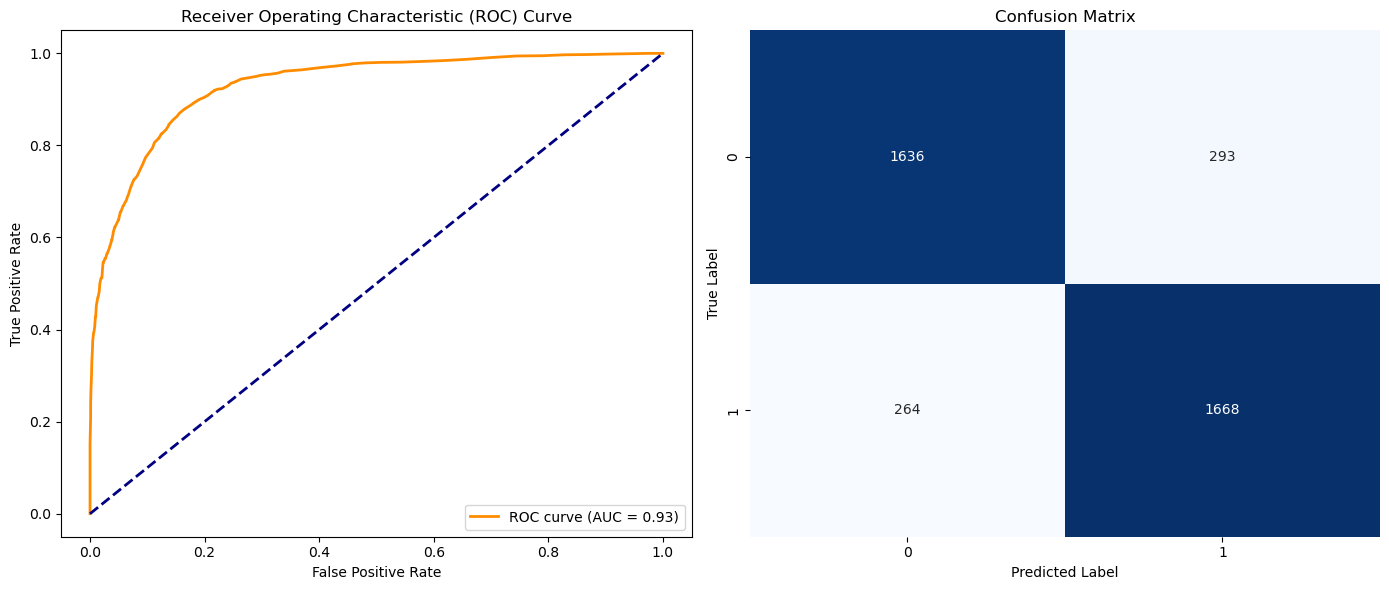

In [37]:
# Model Visualization: ROC Curve and Confusion Matrix

from sklearn.metrics import classification_report, confusion_matrix

# Get predicted probabilities
y_prob = model.predict_proba(x_test_pca)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

# Plot confusion matrix
plt.subplot(1, 2, 2)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')

# Save the ROC curve plot
roc_curve_path = "C:\\Users\\sande\\Desktop\\MSDA 304 VISUALIZATION\\roc_curve.png"
plt.subplot(1, 2, 1)
plt.savefig(roc_curve_path)

# Save the confusion matrix plot
confusion_matrix_path = "C:\\Users\\sande\\Desktop\\MSDA 304 VISUALIZATION\\confusion_matrix.png"
plt.subplot(1, 2, 2)
plt.savefig(confusion_matrix_path)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()
